In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load the dataset
df = pd.read_csv('./diabetes.csv')

# Display the first 5 rows of the dataset
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
#preprocess data
label = df["class"]
features = df[["mass", "age", "insu", "plas"]]

label.head()
# features.head()

#drop all null values
features = features.dropna()
label = label.dropna()

#

In [28]:
# scale the label 
label.replace({"tested_positive": 1, "tested_negative": 0}, inplace=True)
label.head()





0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [79]:
# split our dataset to train, test, validation 80% train, 15% test, 15% validation
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.7, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# count total rows in the dataset
total_rows = len(df)
# print(total_rows)

# shape of the split data
print(X_train.shape, X_test.shape, X_val.shape)


#train the model 
model = RandomForestClassifier()
model2 = LogisticRegression()
model3 = LinearRegression()
model.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)



(161, 4) (538, 4) (69, 4)


LinearRegression()

In [88]:
#score of model on validation set
score1 = model.score(X_val, y_val)
sore2 = model2.score(X_val, y_val)
score3 = model3.score(X_val, y_val)
print(f"RandomForest:{score1}")
print(f"Logistics:{sore2}")
print(f"LinearRegression:{score3}")


#evalate the model on validation set
y_pred = model.predict(X_val)
y_pred2 = model2.predict(X_val)
y_pred3 = model3.predict(X_val)


RandomForest:0.7391304347826086
Logistics:0.8260869565217391
LinearRegression:0.3112410361762986


In [89]:
#evalute the model 
print("randomForest:\n")
print(classification_report(y_val, y_pred))
print("logistic:\n")
print(classification_report( y_val, y_pred2))
print("LinearRegresssion:\n")
print(mean_squared_error( y_val, y_pred3))

randomForest:

              precision    recall  f1-score   support

           0       0.78      0.85      0.82        47
           1       0.61      0.50      0.55        22

    accuracy                           0.74        69
   macro avg       0.70      0.68      0.68        69
weighted avg       0.73      0.74      0.73        69

logistic:

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        47
           1       0.81      0.59      0.68        22

    accuracy                           0.83        69
   macro avg       0.82      0.76      0.78        69
weighted avg       0.82      0.83      0.82        69

LinearRegresssion:

0.14958554265778345


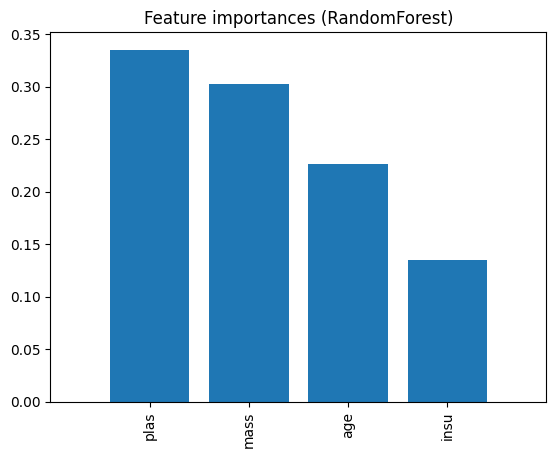

In [97]:
#features importance
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns
plt.figure()
plt.title("Feature importances (RandomForest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


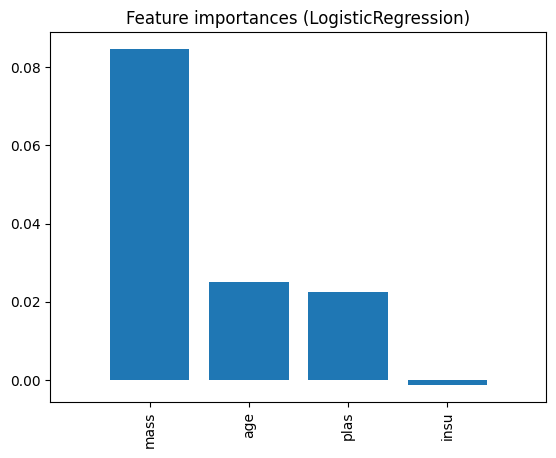

In [98]:
# logistice regression
importances = model2.coef_[0]
indices = np.argsort(importances)[::-1]
features = X_train.columns
plt.figure()
plt.title("Feature importances (LogisticRegression)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [99]:
# predict with userinput 
user_input = [[100, 30, 50, 100]]
print("random-forest", (model.predict(user_input)))
print("logistic", (model2.predict(user_input)))
print("linear", (model3.predict(user_input)))



c:\Users\Bieefilled\Documents\Projects\1. open source\mental health\Elizabeth\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


random-forest [0]


c:\Users\Bieefilled\Documents\Projects\1. open source\mental health\Elizabeth\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


logistic [1]
linear [1.24784248]


c:\Users\Bieefilled\Documents\Projects\1. open source\mental health\Elizabeth\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
